In [1]:
using JLD
using DataFrames
using Statistics
using Plots
pyplot();

include("visualization.jl");

In [2]:
alpha = 0.1
linewidth = 2;
styles = [:solid, :dash, :dot, :dashdot];

## ARX

In [3]:
# Signal lengths
NT = [25, 50, 100, 200, 400, 800, 1600, 3200]
NE = length(NT)

results = zeros(4,NE)
diffs = zeros(2,NE)
for (i,n) in enumerate(NT)

    RMS_FEM = load("results/results-ARX_FEM_M5_deg1_S"*string(n)*".jld", "RMS")
    RMS_RLS = load("results/results-ARX_RLS_M5_deg1_S"*string(n)*".jld", "RMS")
    
    ΔRMS = RMS_FEM .- RMS_RLS
    
    # Filter outliers, infinities and NaNs
    RMS_FEM = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_FEM)))
    RMS_RLS = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_RLS)))
    ΔRMS = filter(x -> x<1., filter(!isinf, filter(!isnan, ΔRMS)))

    results[1,i] = tmean(RMS_FEM, tr=0.05)
    results[2,i] = trimse(RMS_FEM, tr=0.05)
    results[3,i] = tmean(RMS_RLS, tr=0.05)
    results[4,i] = trimse(RMS_RLS, tr=0.05)

    diffs[1,i] = tmean(ΔRMS, tr=0.05)
    diffs[2,i] = trimse(ΔRMS, tr=0.05)
    
end

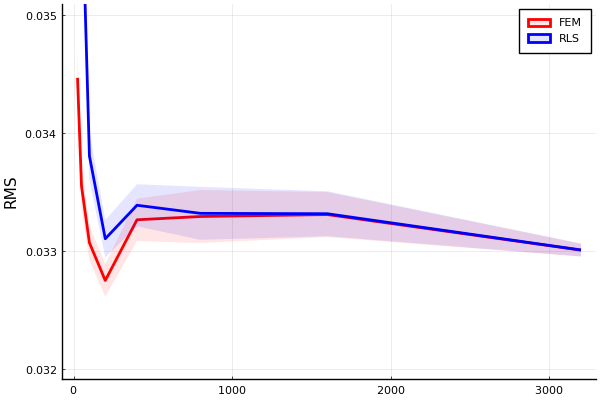

In [4]:
plot(NT, results[1,:], 
     ribbon=[results[2,:] results[2,:]], 
     color="red", 
     label="FEM", 
     ylabel="RMS",
     fillalpha=alpha,
     linewidth=linewidth,
     ylims=[0.032, 0.035])
plot!(NT, results[3,:], 
     ribbon=[results[4,:] results[4,:]], 
     color="blue", 
     fillalpha=alpha,
     linewidth=linewidth,
     label="RLS")

In [5]:
savefig("figures/RMS-ARX.png")

## NARX

In [6]:
# Signal lengths
NT = [50, 100, 200, 400, 800, 1600]
NE = length(NT)

deg = 3

results = zeros(NE,4)
diffs = zeros(NE,2)
for (i,n) in enumerate(NT)

    # Load
    RMS_FEM = load("results/results-NARX_FEM_M5_degree"*string(deg)*"_S"*string(n)*".jld", "RMS")
    RMS_RLS = load("results/results-NARX_RLS_M5_degree"*string(deg)*"_S"*string(n)*".jld", "RMS")
    
    ΔRMS = RMS_RLS .- RMS_FEM
    
    # Filter outliers, infinities and NaNs
    RMS_FEM = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_FEM)))
    RMS_RLS = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_RLS)))
    ΔRMS = filter(x -> x<1., filter(!isinf, filter(!isnan, ΔRMS)))
    
    # Populate RMS array
    results[i,1] = tmean(RMS_FEM, tr=0.05)
    results[i,2] = trimse(RMS_FEM, tr=0.05)
    results[i,3] = tmean(RMS_RLS, tr=0.05)
    results[i,4] = trimse(RMS_RLS, tr=0.05)

    # Populate RMS difference array
    diffs[i,1] = tmean(ΔRMS, tr=0.05)
    diffs[i,2] = trimse(ΔRMS, tr=0.05)
    
end

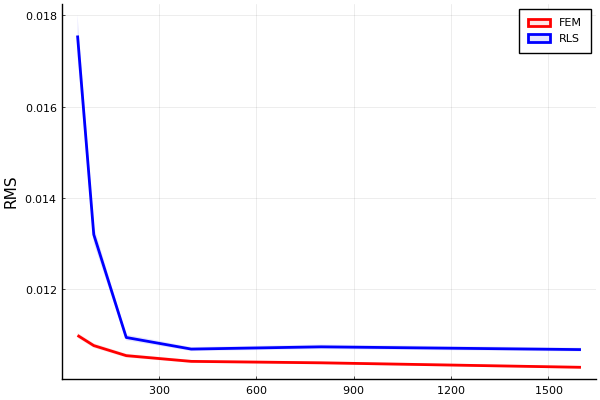

In [7]:
p2 = plot(NT, 
          results[:,1], 
          ribbon=[results[:,2] results[:,2]], 
          color="red", 
          label="FEM", 
#      xscale=:log10,
          linewidth=linewidth,
          fillalpha=alpha,
          ylabel="RMS")
plot!(NT, 
     results[:,3], 
     ribbon=[results[:,4] results[:,4]], 
     color="blue", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="RLS")

In [8]:
savefig(p2, "figures/RMS-NARX.png")

### Comparing multiple degrees

In [9]:
# Signal lengths
NT = [50, 100, 200, 400, 800, 1600]
NE = length(NT)

deg = [1,2,3,4]
ND = length(deg)

results = zeros(4, NE, ND)
diffs = zeros(2, NE, ND)
for d in deg
    for (i,n) in enumerate(NT)

        RMS_FEM = load("results/results-NARX_FEM_M5_degree"*string(d)*"_S"*string(n)*".jld", "RMS")
        RMS_RLS = load("results/results-NARX_RLS_M5_degree"*string(d)*"_S"*string(n)*".jld", "RMS")
        
        ΔRMS = RMS_FEM .- RMS_RLS

        # Filter outliers, infinities and NaNs
        RMS_FEM = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_FEM)))
        RMS_RLS = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_RLS)))
        ΔRMS = filter(x -> x<1., filter(!isinf, filter(!isnan, ΔRMS)))

        results[1,i,d] = tmean(RMS_FEM, tr=0.05)
        results[2,i,d] = trimse(RMS_FEM, tr=0.05)
        results[3,i,d] = tmean(RMS_RLS, tr=0.05)
        results[4,i,d] = trimse(RMS_RLS, tr=0.05)
        
        diffs[1,i,d] = tmean(ΔRMS, tr=0.05)
        diffs[2,i,d] = trimse(ΔRMS, tr=0.05)
    end
end

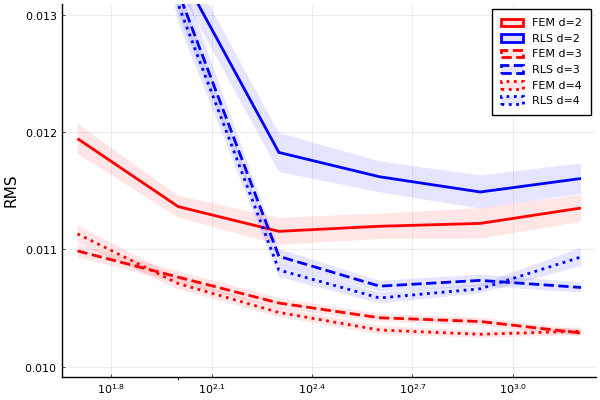

In [10]:
p3 = plot()
for (ii,deg) in enumerate([2,3,4])

    plot!(NT, results[1,:,deg], 
          ribbon=[results[2,:,deg] results[2,:,deg]], 
          color="red", 
          label="FEM d="*string(deg), 
          linestyle=styles[ii],
          fillalpha=alpha,
          linewidth=linewidth,
          ylabel="RMS",
          xscale=:log10,
          ylims=[0.01, 0.013])
    plot!(NT, results[3,:,deg], 
          ribbon=[results[4,:,deg] results[4,:,deg]], 
          color="blue", 
          linestyle=styles[ii],
          fillalpha=alpha,
          linewidth=linewidth,
          label="RLS d="*string(deg))
end
plot!()

In [11]:
savefig(p3, "figures/RMS-NARX_all-degrees.png")

### Errorbars

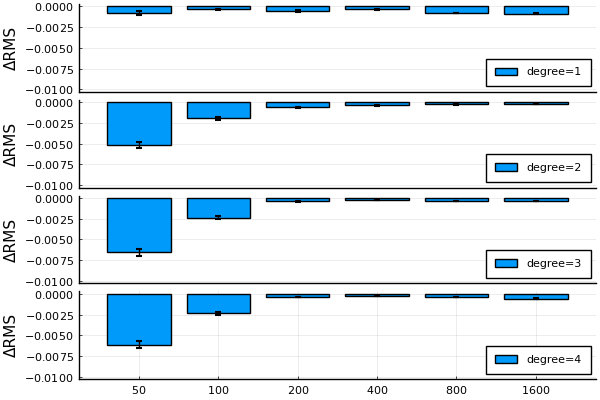

In [12]:
p4a = bar(diffs[1,:,1], yerr=diffs[2,:,1], ylabel="ΔRMS", label="degree=1", ylims=[-0.01, 0.], legend=:bottomright, xticks=:none)
p4b = bar(diffs[1,:,2], yerr=diffs[2,:,2], ylabel="ΔRMS", label="degree=2", ylims=[-0.01, 0.], legend=:bottomright, xticks=:none)
p4c = bar(diffs[1,:,3], yerr=diffs[2,:,3], ylabel="ΔRMS", label="degree=3", ylims=[-0.01, 0.], legend=:bottomright, xticks=:none)
p4d = bar(diffs[1,:,4], yerr=diffs[2,:,4], ylabel="ΔRMS", label="degree=4", ylims=[-0.01, 0.], legend=:bottomright, xticks=(1:NE, NT))
p4 = plot(p4a, p4b, p4c, p4d, layout=(4,1), size=(600,400))

In [13]:
savefig(p4, "figures/errorbars_RMS-NARX_all-degrees.png")

#### Checking normality

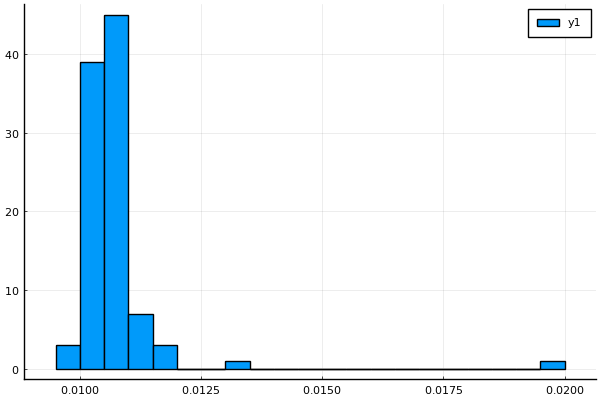

In [14]:
d = 3
n = 200
RMS_FEM = load("results/results-NARX_FEM_M5_degree"*string(d)*"_S"*string(n)*".jld", "RMS")
histogram(RMS_FEM)

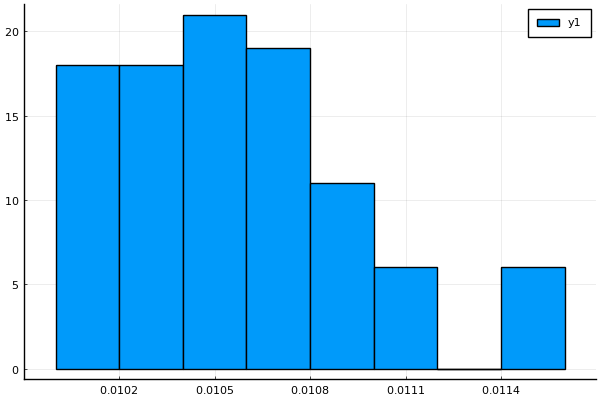

In [15]:
histogram(winval(RMS_FEM, tr=0.05))

## NARMAX

In [16]:
# Signal lengths
NT = [25, 50, 100, 200, 400, 800, 1600]
NE = length(NT)

deg = 4

results = zeros(NE,4)
diffs = zeros(NE,2)
for (i,n) in enumerate(NT)

    # Load
    RMS_FEM = load("results/results-NARMAX_FEM_M7_degree"*string(deg)*"_S"*string(n)*".jld", "RMS")
    RMS_RLS = load("results/results-NARMAX_RLS_M7_degree"*string(deg)*"_S"*string(n)*".jld", "RMS")
    
    ΔRMS = RMS_RLS .- RMS_FEM
    
    # Filter outliers, infinities and NaNs
    RMS_FEM = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_FEM)))
    RMS_RLS = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_RLS)))
    ΔRMS = filter(x -> x<1., filter(!isinf, filter(!isnan, ΔRMS)))
    
    # Populate RMS array
    results[i,1] = tmean(RMS_FEM, tr=0.05)
    results[i,2] = trimse(RMS_FEM, tr=0.05)
    results[i,3] = tmean(RMS_RLS, tr=0.05)
    results[i,4] = trimse(RMS_RLS, tr=0.05)
    
    # Populate RMS difference array
    diffs[i,1] = tmean(ΔRMS, tr=0.05)
    diffs[i,2] = trimse(ΔRMS, tr=0.05)
    
end

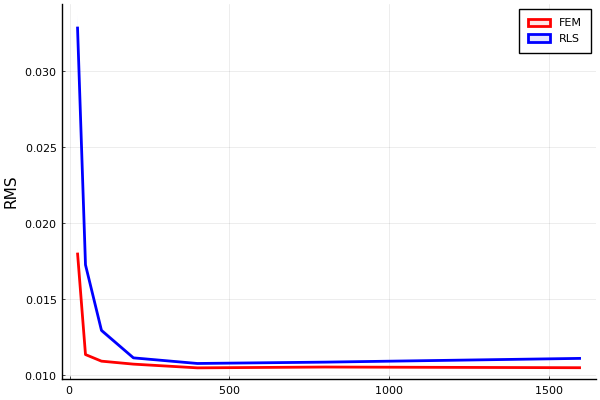

In [17]:
p6 = plot(NT, results[:,1], 
          ribbon=[results[:,2] results[:,2]], 
          color="red", 
          label="FEM", 
#      xscale=:log10,
#           ylims=[0.032, 0.035],
          linewidth=linewidth,
          fillalpha=alpha,
          ylabel="RMS",)
plot!(NT, results[:,3], 
     ribbon=[results[:,4] results[:,4]], 
     color="blue", 
     linewidth=linewidth,
     fillalpha=alpha,
     label="RLS")

In [18]:
savefig(p6, "figures/RMS-NARMAX.png")

### Comparing multiple degrees

In [27]:
# Signal lengths
NT = [25, 50, 100, 200, 400, 800, 1600]
NE = length(NT)

deg = [2,3,4,5]
ND = length(deg)

results = zeros(4, NE, ND)
diffs = zeros(2, NE, ND)
for (j,d) in enumerate(deg)
    for (i,n) in enumerate(NT)

        RMS_FEM = load("results/results-NARMAX_FEM_M7_degree"*string(d)*"_S"*string(n)*".jld", "RMS")
        RMS_RLS = load("results/results-NARMAX_RLS_M7_degree"*string(d)*"_S"*string(n)*".jld", "RMS")
        
        ΔRMS = RMS_FEM .- RMS_RLS

        # Filter outliers, infinities and NaNs
        RMS_FEM = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_FEM)))
        RMS_RLS = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_RLS)))
        ΔRMS = filter(x -> x<1., filter(!isinf, filter(!isnan, ΔRMS)))

        results[1,i,j] = tmean(RMS_FEM, tr=0.05)
        results[2,i,j] = trimse(RMS_FEM, tr=0.05)
        results[3,i,j] = tmean(RMS_RLS, tr=0.05)
        results[4,i,j] = trimse(RMS_RLS, tr=0.05)
        
        diffs[1,i,j] = tmean(ΔRMS, tr=0.05)
        diffs[2,i,j] = trimse(ΔRMS, tr=0.05)
    end
end

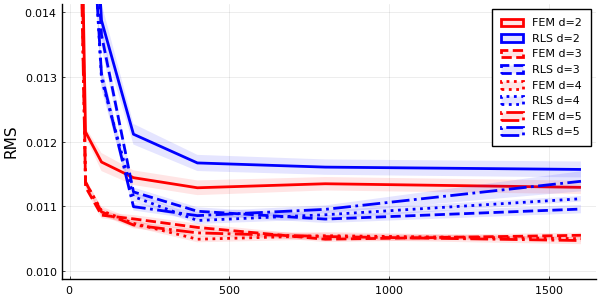

In [28]:
p7 = plot(size=(600,300), legend=:topright)
for (ii,deg) in enumerate(deg)

    plot!(NT, results[1,:,ii], 
          ribbon=[results[2,:,ii] results[2,:,ii]], 
          color="red", 
          label="FEM d="*string(deg), 
          linestyle=styles[ii],
          fillalpha=alpha,
          linewidth=linewidth,
          ylabel="RMS",
#           xscale=:log10,
          ylims=[0.01, 0.014])
    plot!(NT, results[3,:,ii], 
          ribbon=[results[4,:,ii] results[4,:,ii]], 
          color="blue", 
          linestyle=styles[ii],
          fillalpha=alpha,
          linewidth=linewidth,
          label="RLS d="*string(deg))
end
plot!()

In [29]:
savefig(p7, "figures/RMS-NARMAX_all-degrees.png")

### Errorbars

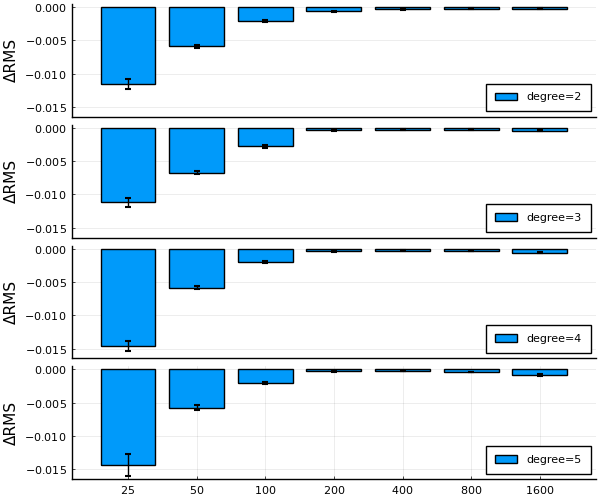

In [30]:
p8a = bar(diffs[1,:,1], yerr=diffs[2,:,1], ylabel="ΔRMS", label="degree="*string(deg[1]), ylims=[-0.016, 0.], legend=:bottomright, xticks=:none)
p8b = bar(diffs[1,:,2], yerr=diffs[2,:,2], ylabel="ΔRMS", label="degree="*string(deg[2]), ylims=[-0.016, 0.], legend=:bottomright, xticks=:none)
p8c = bar(diffs[1,:,3], yerr=diffs[2,:,3], ylabel="ΔRMS", label="degree="*string(deg[3]), ylims=[-0.016, 0.], legend=:bottomright, xticks=:none)
p8d = bar(diffs[1,:,4], yerr=diffs[2,:,4], ylabel="ΔRMS", label="degree="*string(deg[4]), ylims=[-0.016, 0.], legend=:bottomright, xticks=(1:NE, NT))
# p8e = bar(diffs[1,:,5], yerr=diffs[2,:,5], ylabel="ΔRMS", label="degree=5", ylims=[-0.012, 0.], legend=:bottomright, xticks=(1:NE, NT))

p8 = plot(p8a, p8b, p8c, p8d, layout=(4,1), size=(600,500))
# p8 = plot(p8a, p8b, p8c, p8d, p8e, layout=(5,1), size=(600,500))

In [23]:
savefig(p8, "figures/errorbars_RMS-NARMAX_all-degrees.png")